In [ ]:
# Business Problem is to identify which course the students opt to take - Vocation or Academic based on data available

In [1]:
#pandas and numpy library
import pandas as pd
import numpy as np

In [2]:
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
# import data
df = pd.read_csv('Program_Choice.csv', index_col=0)

In [42]:
#Ignore warnings
import warnings 
warnings.filterwarnings( "ignore")

In [4]:
df.head()

Unnamed: 0     id  female     ses  schtyp      prog  read  write  math  \
0           0   45.0  female     low  public  vocation  34.0   35.0  41.0   
1           1  108.0    male  middle  public  vocation  34.0   33.0  41.0   
2           2   15.0    male    high  public  vocation  39.0   39.0  44.0   
3           3   67.0    male     low  public  vocation  37.0   37.0  42.0   
4           4  153.0    male  middle  public  vocation  39.0   31.0  40.0   

   science  socst        honors  awards  cid  
0     29.0   26.0  not enrolled     0.0    1  
1     36.0   36.0  not enrolled     0.0    1  
2     26.0   42.0  not enrolled     0.0    1  
3     33.0   32.0  not enrolled     0.0    1  
4     39.0   51.0  not enrolled     0.0    1

In [7]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=200)

In [ ]:
# Predicting the Program choice -- Predictive analytics problem


In [ ]:
# Define Business problem
# Acquire Data
# Clean Data
# Transform Data
# EDA


In [ ]:
 # check for non null values to proceed with anaysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       200 non-null    float64
 1   female   200 non-null    object 
 2   ses      200 non-null    object 
 3   schtyp   200 non-null    object 
 4   prog     200 non-null    object 
 5   read     200 non-null    float64
 6   write    200 non-null    float64
 7   math     200 non-null    float64
 8   science  200 non-null    float64
 9   socst    200 non-null    float64
 10  honors   200 non-null    object 
 11  awards   200 non-null    float64
 12  cid      200 non-null    int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 21.9+ KB


In [10]:
df.isnull()

id  female    ses  schtyp   prog   read  write   math  science  socst  \
0    False   False  False   False  False  False  False  False    False  False   
1    False   False  False   False  False  False  False  False    False  False   
2    False   False  False   False  False  False  False  False    False  False   
3    False   False  False   False  False  False  False  False    False  False   
4    False   False  False   False  False  False  False  False    False  False   
..     ...     ...    ...     ...    ...    ...    ...    ...      ...    ...   
195  False   False  False   False  False  False  False  False    False  False   
196  False   False  False   False  False  False  False  False    False  False   
197  False   False  False   False  False  False  False  False    False  False   
198  False   False  False   False  False  False  False  False    False  False   
199  False   False  False   False  False  False  False  False    False  False   

     honors  awards    cid  
0     False   False  False  
1     False   False  False  
2     False   False  False  
3     False   False  False  
4     False   False  False  
..      ...     ...    ...  
195   False   False  False  
196   False   False  False  
197   False   False  False  
198   False   False  False  
199   False   False  False  

[200 rows x 13 columns]

In [11]:
df.isnull().sum()

id         0
female     0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
honors     0
awards     0
cid        0
dtype: int64

In [13]:
# Dropping unwanted colmns
df.drop(['id', 'cid'], axis =1, inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   female   200 non-null    object 
 1   ses      200 non-null    object 
 2   schtyp   200 non-null    object 
 3   prog     200 non-null    object 
 4   read     200 non-null    float64
 5   write    200 non-null    float64
 6   math     200 non-null    float64
 7   science  200 non-null    float64
 8   socst    200 non-null    float64
 9   honors   200 non-null    object 
 10  awards   200 non-null    float64
dtypes: float64(6), object(5)
memory usage: 18.8+ KB


In [14]:
df.head()

female     ses  schtyp      prog  read  write  math  science  socst  \
0  female     low  public  vocation  34.0   35.0  41.0     29.0   26.0   
1    male  middle  public  vocation  34.0   33.0  41.0     36.0   36.0   
2    male    high  public  vocation  39.0   39.0  44.0     26.0   42.0   
3    male     low  public  vocation  37.0   37.0  42.0     33.0   32.0   
4    male  middle  public  vocation  39.0   31.0  40.0     39.0   51.0   

         honors  awards  
0  not enrolled     0.0  
1  not enrolled     0.0  
2  not enrolled     0.0  
3  not enrolled     0.0  
4  not enrolled     0.0

In [ ]:
# Making different list of column names for continous and Discrete variables
cat = [] # categorical list
num = [] # Numerical list

In [16]:
df.columns

Index(['female', 'ses', 'schtyp', 'prog', 'read', 'write', 'math', 'science',
       'socst', 'honors', 'awards'],
      dtype='object')

In [21]:
cat = [] # categorical list
num = [] # Numerical list

for i in df.columns:
    if df[i].dtype == "object":
        cat.append(i)
    else:
        num.append(i)
        
print(cat)
print(num)

['female', 'ses', 'schtyp', 'prog', 'honors']
['read', 'write', 'math', 'science', 'socst', 'awards']


In [22]:
# Describe Data statiscally
df[num].describe().T

count    mean        std   min    25%   50%   75%   max
read     200.0  52.230  10.252937  28.0  44.00  50.0  60.0  76.0
write    200.0  52.775   9.478586  31.0  45.75  54.0  60.0  67.0
math     200.0  52.645   9.368448  33.0  45.00  52.0  59.0  75.0
science  200.0  51.850   9.900891  26.0  44.00  53.0  58.0  74.0
socst    200.0  52.405  10.735793  26.0  46.00  52.0  61.0  71.0
awards   200.0   1.670   1.818691   0.0   0.00   1.0   2.0   7.0

In [23]:

df[cat].describe().T

count unique           top freq
female   200      2        female  109
ses      200      3        middle   95
schtyp   200      2        public  168
prog     200      2      academic  105
honors   200      2  not enrolled  147

In [25]:
df['ses'].value_counts()

middle    95
high      58
low       47
Name: ses, dtype: int64

In [26]:
# Duplicates
df.duplicated().sum #checking if there is duplicate


<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool>

In [ ]:
# to drop the duplicate
# df.drop_duplicates(inplace=True)

In [28]:
# univariate EDA 
#Histograms, Box Plots for each continous variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='read', ylabel='Density'>

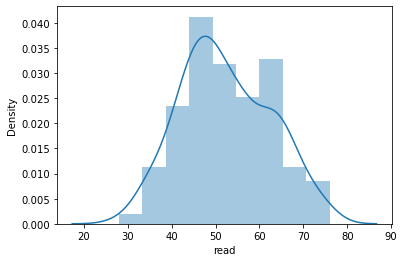

In [30]:
#Univariate
sns.distplot(df['read'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='read'>

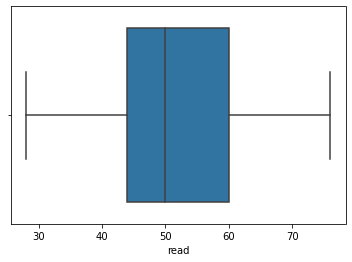

In [32]:
sns.boxplot(df['read'], orient="v")

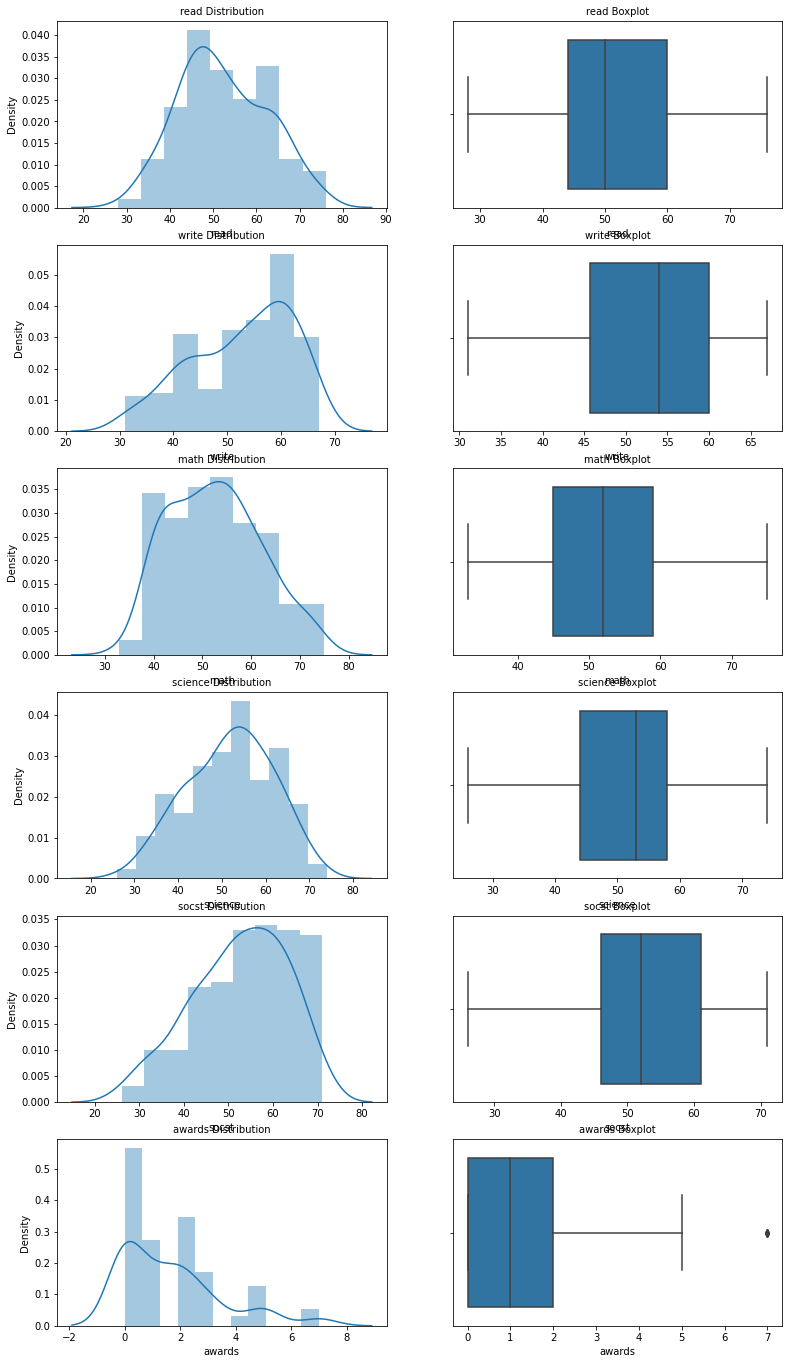

In [46]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(13,24)

a = sns.distplot(df['read'] , ax=axes[0][0])
a.set_title("read Distribution",fontsize=10)

a = sns.boxplot(df['read'] , orient = "v"  , ax=axes[0][1])
a.set_title("read Boxplot",fontsize=10)

a = sns.distplot(df['write'] , ax=axes[1][0])
a.set_title("write Distribution",fontsize=10)

a = sns.boxplot(df['write'] , orient = "v" , ax=axes[1][1])
a.set_title("write Boxplot",fontsize=10)


a = sns.distplot(df['math'] , ax=axes[2][0])
a.set_title("math Distribution",fontsize=10)

a = sns.boxplot(df['math'] , orient = "v" , ax=axes[2][1])
a.set_title("math Boxplot",fontsize=10)


a = sns.distplot(df['science'] , ax=axes[3][0])
a.set_title("science Distribution",fontsize=10)

a = sns.boxplot(df['science'] , orient = "v" , ax=axes[3][1])
a.set_title("science Boxplot",fontsize=10)

a = sns.distplot(df['socst'] , ax=axes[4][0])
a.set_title("socst Distribution",fontsize=10)

a = sns.boxplot(df['socst'] , orient = "v" , ax=axes[4][1])
a.set_title("socst Boxplot",fontsize=10)

a = sns.distplot(df['awards'] , ax=axes[5][0])
a.set_title("awards Distribution",fontsize=10)

a = sns.boxplot(df['awards'] , orient = "v" , ax=axes[5][1])
a.set_title("awards Boxplot",fontsize=10)

plt.show()

In [47]:
# Bivariate analysis
# Program vs continous variables

In [48]:
px.box(df, x='prog', y='read', points='all')

In [49]:
px.box(df, x='prog', y='write', points='all')

In [50]:
px.box(df, x='prog', y='math', points='all')

In [51]:
px.box(df, x='prog', y='science', points='all')

In [52]:
px.box(df, x='prog', y='socst', points='all')

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop('prog', axis=1)
y = df.prog

In [59]:
X.head()

female     ses  schtyp  read  write  math  science  socst        honors  \
0  female     low  public  34.0   35.0  41.0     29.0   26.0  not enrolled   
1    male  middle  public  34.0   33.0  41.0     36.0   36.0  not enrolled   
2    male    high  public  39.0   39.0  44.0     26.0   42.0  not enrolled   
3    male     low  public  37.0   37.0  42.0     33.0   32.0  not enrolled   
4    male  middle  public  39.0   31.0  40.0     39.0   51.0  not enrolled   

   awards  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [60]:
X = df[num]
y = df.prog

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [63]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [64]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [65]:
logmodel.predict(X_test)

array(['academic', 'vocation', 'academic', 'vocation', 'academic',
       'academic', 'academic', 'academic', 'vocation', 'vocation',
       'academic', 'academic', 'academic', 'academic', 'vocation',
       'academic', 'academic', 'academic', 'academic', 'vocation',
       'vocation', 'vocation', 'vocation', 'academic', 'academic',
       'academic', 'academic', 'academic', 'academic', 'vocation',
       'vocation', 'vocation', 'academic', 'academic', 'academic',
       'vocation', 'vocation', 'academic', 'academic', 'academic',
       'academic', 'academic', 'academic', 'academic', 'vocation',
       'vocation', 'vocation', 'vocation', 'vocation', 'academic',
       'vocation', 'academic', 'vocation', 'academic', 'vocation',
       'vocation', 'academic', 'academic', 'vocation', 'vocation'],
      dtype=object)

In [66]:
y_test

126    academic
104    vocation
99     vocation
92     vocation
111    academic
167    academic
116    academic
96     academic
52     vocation
69     vocation
164    academic
124    academic
182    academic
154    vocation
125    academic
196    vocation
194    academic
177    academic
163    academic
31     vocation
11     academic
73     vocation
15     vocation
41     academic
97     vocation
128    academic
133    academic
82     academic
139    academic
123    academic
83     vocation
65     vocation
151    academic
162    academic
170    vocation
77     vocation
32     academic
173    vocation
174    academic
85     academic
168    academic
112    academic
171    academic
181    academic
7      vocation
46     vocation
75     vocation
28     academic
29     academic
195    academic
40     vocation
153    vocation
115    vocation
64     vocation
59     vocation
1      vocation
192    academic
136    academic
152    academic
161    vocation
Name: prog, dtype: object